In [30]:
from utils import data_loader
from utils.heat_map import HeatMap
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

In [33]:
image = imread('examples/video9_00060.jpg', as_gray=True)
image = resize(image, (480, 640))
mask = np.zeros((480, 640))
mask_ = imread('examples/video9_00060.png', as_gray=True)
mask, points = data_loader.mapping_rescale_dot(mask, mask_)
transpose_points = np.transpose(points)

In [34]:
points

array([[ 64, 258],
       [ 67, 229],
       [ 68, 347],
       [ 80, 317],
       [111, 301],
       [130, 252],
       [170, 141],
       [180, 239],
       [318, 167]])

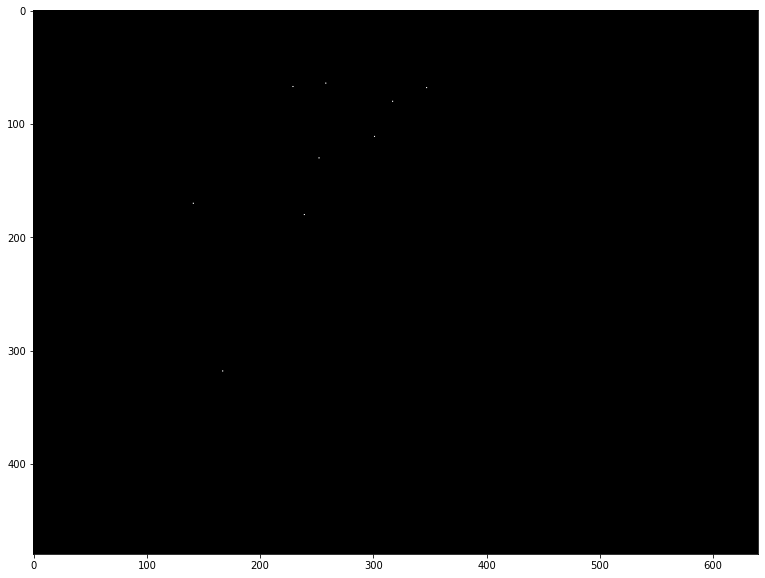

In [35]:
plt.figure(figsize=(20, 10))
plt.imshow(mask, cmap='gray')
plt.show()

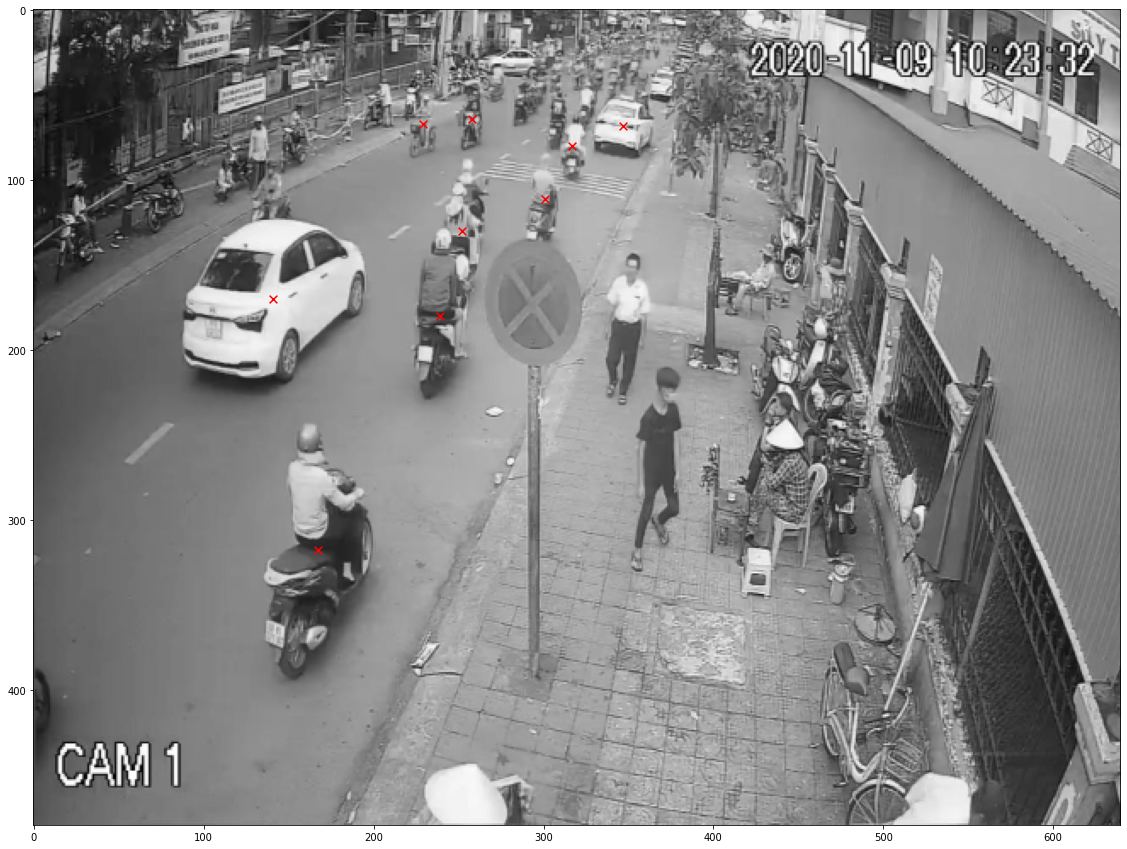

In [36]:
plt.figure(figsize=(30, 15))
plt.scatter(x=transpose_points[1], y=transpose_points[0], marker='x', color="red", s=60)
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
mask_illusion = data_loader.dot_illusion(ground_truth_shape=mask.shape, points=points, gap_spaces=(10,5))
density_map_spread = data_loader.gaussian_filter_density(mask_illusion, fixed_sigma=10)

In [5]:
np.sum(density_map_spread)

8.999999

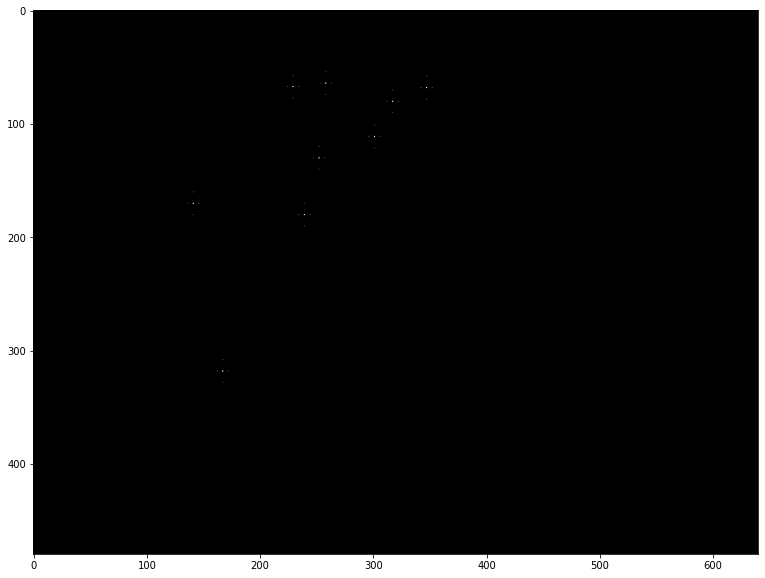

In [6]:
plt.figure(figsize=(20, 10))
plt.imshow(mask_illusion, cmap='gray')
plt.show()

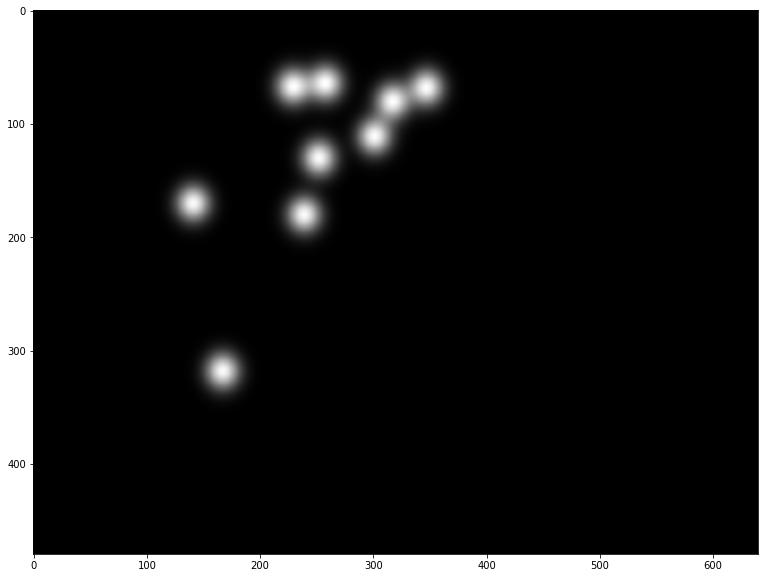

In [15]:
plt.figure(figsize=(20, 10))
plt.imshow(density_map_spread, cmap='gray')
plt.show()

In [16]:
np.sum(mask_illusion)

19.0

In [17]:
np.sum(density_map_spread)

18.95098

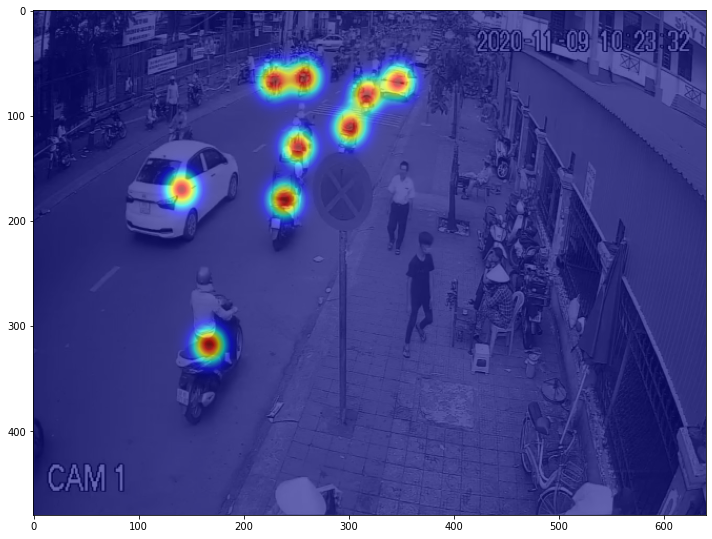

In [32]:
hm = HeatMap(image, density_map_spread, gaussian_std=0)
hm.plot(transparency=0.6, color_map='jet', show_axis=True)